In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("neelshah18/arxivdataset")

print("Path to dataset files:", path)

100%|██████████| 18.3M/18.3M [00:01<00:00, 10.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/neelshah18/arxivdataset/versions/2


In [ ]:
import os
import json

file_path = path + "/arxivData.json"

with open(file_path, 'r') as f:
    data = json.load(f)
print(data[:5])

[{'author': "[{'name': 'Ahmed Osman'}, {'name': 'Wojciech Samek'}]", 'day': 1, 'id': '1802.00209v1', 'link': "[{'rel': 'alternate', 'href': 'http://arxiv.org/abs/1802.00209v1', 'type': 'text/html'}, {'rel': 'related', 'href': 'http://arxiv.org/pdf/1802.00209v1', 'type': 'application/pdf', 'title': 'pdf'}]", 'month': 2, 'summary': 'We propose an architecture for VQA which utilizes recurrent layers to\ngenerate visual and textual attention. The memory characteristic of the\nproposed recurrent attention units offers a rich joint embedding of visual and\ntextual features and enables the model to reason relations between several\nparts of the image and question. Our single model outperforms the first place\nwinner on the VQA 1.0 dataset, performs within margin to the current\nstate-of-the-art ensemble model. We also experiment with replacing attention\nmechanisms in other state-of-the-art models with our implementation and show\nincreased accuracy. In both cases, our recurrent attention mec

In [ ]:
import json
import pandas as pd

with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)


papers = []
for paper in data:
    papers.append({
        "id": paper.get("id", "N/A"),
        "author": paper.get("author", "N/A"),
        "day": paper.get("day", "N/A"),
        "month": paper.get("month", "N/A"),
        "summary": paper.get("summary", "N/A"),
        "link": paper.get("link", "N/A"),
        "tag": paper.get("tag", "N/A")
    })


df = pd.DataFrame(papers)
df.head()


,id,author,day,month,summary,link,tag
0,1802.00209v1,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...",1,2,We propose an architecture for VQA which utili...,"[{'rel': 'alternate', 'href': 'http://arxiv.or...","[{'term': 'cs.AI', 'scheme': 'http://arxiv.org..."
1,1603.03827v1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...",12,3,Recent approaches based on artificial neural n...,"[{'rel': 'alternate', 'href': 'http://arxiv.or...","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org..."
2,1606.00776v2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...",2,6,We introduce the multiresolution recurrent neu...,"[{'rel': 'alternate', 'href': 'http://arxiv.or...","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org..."
3,1705.08142v2,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...",23,5,Multi-task learning is motivated by the observ...,"[{'rel': 'alternate', 'href': 'http://arxiv.or...","[{'term': 'stat.ML', 'scheme': 'http://arxiv.o..."
4,1709.02349v2,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...",7,9,We present MILABOT: a deep reinforcement learn...,"[{'rel': 'alternate', 'href': 'http://arxiv.or...","[{'term': 'cs.CL', 'scheme': 'http://arxiv.org..."


In [ ]:
df.shape

(41000, 7)

## Basic Preprocessing of the dataset


In [ ]:
import ast

def extract_authors(author_list):
    try:
        authors = ast.literal_eval(author_list)
        return ", ".join([author["name"] for author in authors])
    except:
        return "Unknown"

def extract_pdf_link(link_list):
    try:
        links = ast.literal_eval(link_list)
        for link in links:
            if link.get("type") == "application/pdf":
                return link.get("href", "")
        return ""
    except:
        return ""

def extract_tags(tag_list):
    try:
        tags = ast.literal_eval(tag_list)
        return ", ".join([tag["term"] for tag in tags])
    except:
        return ""


df["author"] = df["author"].apply(extract_authors)
df["pdf_link"] = df["link"].apply(extract_pdf_link)
df["tags"] = df["tag"].apply(extract_tags)


df.drop(columns=["day", "month", "link", "tag"], inplace=True)

df.head()


,id,author,summary,pdf_link,tags
0,1802.00209v1,"Ahmed Osman, Wojciech Samek",We propose an architecture for VQA which utili...,http://arxiv.org/pdf/1802.00209v1,"cs.AI, cs.CL, cs.CV, cs.NE, stat.ML"
1,1603.03827v1,"Ji Young Lee, Franck Dernoncourt",Recent approaches based on artificial neural n...,http://arxiv.org/pdf/1603.03827v1,"cs.CL, cs.AI, cs.LG, cs.NE, stat.ML"
2,1606.00776v2,"Iulian Vlad Serban, Tim Klinger, Gerald Tesaur...",We introduce the multiresolution recurrent neu...,http://arxiv.org/pdf/1606.00776v2,"cs.CL, cs.AI, cs.LG, cs.NE, stat.ML, I.5.1; I.2.7"
3,1705.08142v2,"Sebastian Ruder, Joachim Bingel, Isabelle Auge...",Multi-task learning is motivated by the observ...,http://arxiv.org/pdf/1705.08142v2,"stat.ML, cs.AI, cs.CL, cs.LG, cs.NE"
4,1709.02349v2,"Iulian V. Serban, Chinnadhurai Sankar, Mathieu...",We present MILABOT: a deep reinforcement learn...,http://arxiv.org/pdf/1709.02349v2,"cs.CL, cs.AI, cs.LG, cs.NE, stat.ML, I.5.1; I.2.7"


In [ ]:
missing_links = df[df["pdf_link"].isna() | (df["pdf_link"] == "")]
print(f"papers with no links: {len(missing_links)}")



papers with no links: 0


In [ ]:
import pandas as pd
df = pd.read_csv("arxiv_dataset_preprocessed.csv")

## Took a sample of the dataset


In [ ]:
df_sample = df.sample(n=5000, random_state=42).reset_index(drop=True)

In [ ]:
!pip install requests pymupdf pandas tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 113.4 MB/s eta 0:00:00


## Removed invalid links


In [ ]:
import pandas as pd
import requests
from io import BytesIO
import fitz  # PyMuPDF
from concurrent.futures import ThreadPoolExecutor

# Step 2: Filter out invalid PDF links
def is_valid_pdf(pdf_url):
    try:
        response = requests.head(pdf_url, timeout=10)
        return response.status_code == 200
    except requests.exceptions.RequestException:
        return False

def filter_invalid_pdfs_parallel(df):
    with ThreadPoolExecutor(max_workers=10) as executor:
        results = list(executor.map(is_valid_pdf, df["pdf_link"]))
    return df[results].reset_index(drop=True)

df_valid = filter_invalid_pdfs_parallel(df_sample)
print(f"Valid papers after checking links: {len(df_valid)}")

Valid papers after checking links: 4945


## Extracted text

In [ ]:
def extract_text_from_pdf(pdf_url):
    try:
        response = requests.get(pdf_url, timeout=20)
        response.raise_for_status()
        pdf_document = fitz.open(stream=BytesIO(response.content), filetype="pdf")
        return "\n".join([pdf_document[i].get_text() for i in range(len(pdf_document))])
    except Exception as e:
        print(f"Failed to extract text from {pdf_url}: {e}")
        return ""

def extract_texts_concurrently(df):
    with ThreadPoolExecutor(max_workers=6) as executor:
        texts = list(executor.map(extract_text_from_pdf, df["pdf_link"]))
    df["paper_text"] = texts
    return df

df_with_text = extract_texts_concurrently(df_valid)


MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: cannot create appearance stream for Screen annotations

MuPDF error: unsupported error: 

In [ ]:
df_with_text.to_csv("sample_5000_with_text.csv", index=False)
print("✅ Extraction completed. Saved to sample_5000_with_text.csv")

✅ Extraction completed. Saved to sample_5000_with_text.csv


In [ ]:
print(df_with_text.head(1)["paper_text"].iloc[0])


 
 
Principal Graphs and Manifolds 
 
 
Alexander N. Gorban 
University of Leicester, United Kingdom 
 
Andrei Y. Zinovyev 
Institut Curie, Paris, France 
 
 
ABSTRACT 
In 
many 
physical, 
statistical, 
biological 
and 
other 
investigations it is desirable to approximate a system of 
points by objects of lower dimension and/or complexity. For 
this purpose, Karl Pearson invented principal component 
analysis in 1901 and found ‘lines and planes of closest fit 
to system of points’. The famous k-means algorithm solves the 
approximation problem too, but by finite sets instead of 
lines and planes. This chapter gives a brief practical 
introduction into the methods of construction of general 
principal objects, i.e. objects embedded in the ‘middle’ of 
the multidimensional data set. As a basis, the unifying 
framework of mean squared distance approximation of finite 
datasets is selected. Principal graphs and manifolds are 
constructed as generalisations of principal components and k-
m

In [ ]:
df_with_text.head(1)

,id,author,summary,pdf_link,tags,paper_text
0,0809.0490v2,"A. N. Gorban, A. Y. Zinovyev","In many physical, statistical, biological and ...",http://arxiv.org/pdf/0809.0490v2,"cs.LG, cs.NE, stat.ML",\n \nPrincipal Graphs and Manifolds \n \n \nA...


## Preprocessing Text


In [ ]:
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Remove non-UTF characters
    text = text.encode('ascii', 'ignore').decode()

    # Remove extra whitespace and line breaks
    text = re.sub(r'\s+', ' ', text)

    # Optional: Remove common header/footer junk from arXiv papers
    text = re.sub(r'(References|Bibliography|Appendix).*$', '', text, flags=re.IGNORECASE)

    return text.strip()

# Apply to the dataframe
df_with_text['cleaned_paper_text'] = df_with_text['paper_text'].apply(preprocess_text)


In [ ]:
print(df_with_text.loc[0, "cleaned_paper_text"])

Principal Graphs and Manifolds Alexander N. Gorban University of Leicester, United Kingdom Andrei Y. Zinovyev Institut Curie, Paris, France ABSTRACT In many physical, statistical, biological and other investigations it is desirable to approximate a system of points by objects of lower dimension and/or complexity. For this purpose, Karl Pearson invented principal component analysis in 1901 and found lines and planes of closest fit to system of points. The famous k-means algorithm solves the approximation problem too, but by finite sets instead of lines and planes. This chapter gives a brief practical introduction into the methods of construction of general principal objects, i.e. objects embedded in the middle of the multidimensional data set. As a basis, the unifying framework of mean squared distance approximation of finite datasets is selected. Principal graphs and manifolds are constructed as generalisations of principal components and k- means principal points. For this purpose, th

In [ ]:
df_with_text = df_with_text.drop("paper_text",axis=1);
df_with_text =df_with_text.rename(columns={"cleaned_paper_text":"paper_text"})
df_with_text.to_csv("sample_5000_with_cleaned_text.csv", index=False)

In [ ]:
import pandas as pd

df = pd.read_csv("sample_5000_with_cleaned_text.csv")

In [ ]:
df = df.drop(columns=['author','pdf_link','tags'])

## Basic Data Analysis

In [ ]:
import numpy as np

# Calculate word counts
df['summary_word_count'] = df['summary'].apply(lambda x: len(str(x).split()))
df['paper_text_word_count'] = df['paper_text'].apply(lambda x: len(str(x).split()))

# Calculate upper whisker for paper_text_word_count
q1 = np.percentile(df['paper_text_word_count'], 25)
q3 = np.percentile(df['paper_text_word_count'], 75)
iqr = q3 - q1
upper_whisker = q3 + 1.5 * iqr


In [ ]:
df = df[df['paper_text_word_count'] <= upper_whisker]
df=df.drop(columns=['paper_text_word_count','summary_word_count'])
print(df.shape)


(4817, 3)


In [ ]:
!pip install transformers datasets accelerate evaluate rouge_score


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.3 MB/s eta 0:00:0

## LLM Based preprocessing

In [ ]:
from datasets import Dataset
import pandas as pd

def preprocess_for_t5(df):
    df = df[["paper_text", "summary"]].dropna()
    df["input_text"] = "summarize: " + df["paper_text"].str.strip()
    df["target_text"] = df["summary"].str.strip()
    return df[["input_text", "target_text"]]

# Convert to Hugging Face Dataset
processed_df = preprocess_for_t5(df)
dataset = Dataset.from_pandas(processed_df)


In [ ]:
dataset = dataset.train_test_split(test_size=0.2)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['input_text', 'target_text', '__index_level_0__'],
        num_rows: 3852
    })
    test: Dataset({
        features: ['input_text', 'target_text', '__index_level_0__'],
        num_rows: 963
    })
})

In [ ]:
text = dataset['test'][0]['input_text']
reference = dataset['test'][0]['target_text']
print(reference)

The Nystrom method is an efficient technique to speed up large-scale learning
applications by generating low-rank approximations. Crucial to the performance
of this technique is the assumption that a matrix can be well approximated by
working exclusively with a subset of its columns. In this work we relate this
assumption to the concept of matrix coherence and connect matrix coherence to
the performance of the Nystrom method. Making use of related work in the
compressed sensing and the matrix completion literature, we derive novel
coherence-based bounds for the Nystrom method in the low-rank setting. We then
present empirical results that corroborate these theoretical bounds. Finally,
we present more general empirical results for the full-rank setting that
convincingly demonstrate the ability of matrix coherence to measure the degree
to which information can be extracted from a subset of columns.


In [ ]:
dataset["train"] = dataset["train"].select(range(900))
dataset["test"] = dataset["test"].select(range(100))

# Comparision of LLMs


### t5-small

In [ ]:
from transformers import pipeline, T5Tokenizer, T5ForConditionalGeneration
from evaluate import load

# Load ROUGE evaluation metric
rouge = load("rouge")

# Load T5-small model and tokenizer
model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Initialize summarizer pipeline
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=-1)  # Use device=-1 for CPU

try:
    # Perform summarization
    summary_output = summarizer(text, max_length=1024, min_length=50, do_sample=False)
    summary = summary_output[0]['summary_text']
except Exception as e:
    print("Error during summarization:", e)
    summary = None

# Compute ROUGE scores if summary is generated
if summary:
    scores = rouge.compute(
        predictions=[summary],
        references=[reference],
        use_stemmer=True
    )
    print("ROUGE scores:", scores)
else:
    print("Summarization failed, skipping ROUGE computation.")


Device set to use cpu
Token indices sequence length is longer than the specified maximum sequence length for this model (7983 > 512). Running this sequence through the model will result in indexing errors


ROUGE scores: {'rouge1': np.float64(0.3627906976744186), 'rouge2': np.float64(0.1971830985915493), 'rougeL': np.float64(0.21395348837209308), 'rougeLsum': np.float64(0.3627906976744186)}


In [ ]:
summary

'we propose a novel extension to ADAN by adding a topic-specic utterance . we measure the ability of a bot to converse on a wide range of topics . a ne-grained conversational bot is able to sustain coherent conversations . this is based on the data from the internal Question data .'

### Bart-large-cnn


In [ ]:
from transformers import pipeline
from evaluate import load
rouge = load("rouge")

# Use CPU
summarizer = pipeline("summarization", model="facebook/bart-large-cnn", device=-1)


ttext = text[:2000]

try:
    summary_output = summarizer(ttext, max_length=1024, min_length=50, do_sample=False)
    summary = summary_output[0]['summary_text']
except Exception as e:
    print("Error during summarization:", e)
    summary = None


reference = dataset['test'][0]['target_text']

if summary:
    scores = rouge.compute(
        predictions=[summary],
        references=[reference],
        use_stemmer=True
    )
    print("ROUGE scores:", scores)
else:
    print("Summarization failed, skipping ROUGE computation.")



Device set to use cpu
Your max_length is set to 1024, but your input_length is only 417. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=208)


ROUGE scores: {'rouge1': np.float64(0.41314553990610325), 'rouge2': np.float64(0.33175355450236965), 'rougeL': np.float64(0.35680751173708924), 'rougeLsum': np.float64(0.41314553990610325)}


In [ ]:
summary

'Achieving sustained, coherent and engaging dialog is the next frontier for conversational AI. We propose to evaluate dialog quality using topic-based metrics. We compare our proposed topic based metrics with the ratings provided by users. We show that our metrics both correlate with and complement human judgment.'

### long-t5-tglobal-base

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import torch

# Use CPU if no GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device set to:", device)

# Load LongT5 model & tokenizer
model_name = "google/long-t5-tglobal-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name).to(device)


# Tokenize input
inputs = tokenizer(
    text,
    return_tensors="pt",
    truncation=True,
    max_length=4096,  # or 2048 if needed
    padding="max_length"
).to(device)

# Generate summary
try:
    summary_ids = model.generate(
        input_ids=inputs["input_ids"],
        attention_mask=inputs["attention_mask"],
        max_length=512,
        min_length=50,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    print("Generated Summary:\n", summary)
except Exception as e:
    print("Error during summarization:", e)

# Compute ROUGE
from evaluate import load
rouge = load("rouge")

scores = rouge.compute(
    predictions=[summary],
    references=[reference],
    use_stemmer=True
)
print("ROUGE scores:", scores)


Device set to: cuda
Generated Summary:
 summarize: Topic-based Evaluation for Conversational Bots Fenfei Guo, 1 Angeliki Metallinou,2 Chandra Khatri,2 Anirudh Raju,2 Anu Venkatesh,2 Ashwin Ram2 1University of Maryland, Department of Computer Science and UMIACS, 2Amazon Alexa fenfeigo@cs.umd.edu, ametalli,ckhatri,ranirudh,anuvenk,ashwram@amazon.com Abstract Dialog evaluation is a challenging problem, especially for non task-oriented dialogs where conversational success is not well-dened. The utterance representation sk per topic is computed through weighted average: [k,1, , k,L] = softmax([wk,1, , wk,L]), sk = 1 L L X i=1 k,iei (1) In Figure 2, the topic-specic sentence representation S is a K D matrix where each row is a topic specic representation sk and D is the embedding dimension. Assuming an utterance [e1, , eL] of length L, where ei is the embedding of the ith word, we compute the attention weights [k,1, , k,L] by normalizing the saliency wk,i with a softmax function (we normaliz

In [ ]:
summary

'summarize: Topic-based Evaluation for Conversational Bots Fenfei Guo, 1 Angeliki Metallinou,2 Chandra Khatri,2 Anirudh Raju,2 Anu Venkatesh,2 Ashwin Ram2 1University of Maryland, Department of Computer Science and UMIACS, 2Amazon Alexa fenfeigo@cs.umd.edu, ametalli,ckhatri,ranirudh,anuvenk,ashwram@amazon.com Abstract Dialog evaluation is a challenging problem, especially for non task-oriented dialogs where conversational success is not well-dened. The utterance representation sk per topic is computed through weighted average: [k,1, , k,L] = softmax([wk,1, , wk,L]), sk = 1 L L X i=1 k,iei (1) In Figure 2, the topic-specic sentence representation S is a K D matrix where each row is a topic specic representation sk and D is the embedding dimension. Assuming an utterance [e1, , eL] of length L, where ei is the embedding of the ith word, we compute the attention weights [k,1, , k,L] by normalizing the saliency wk,i with a softmax function (we normalize across utterance of length L as oppos

### comparing the above 3 LLMs performance

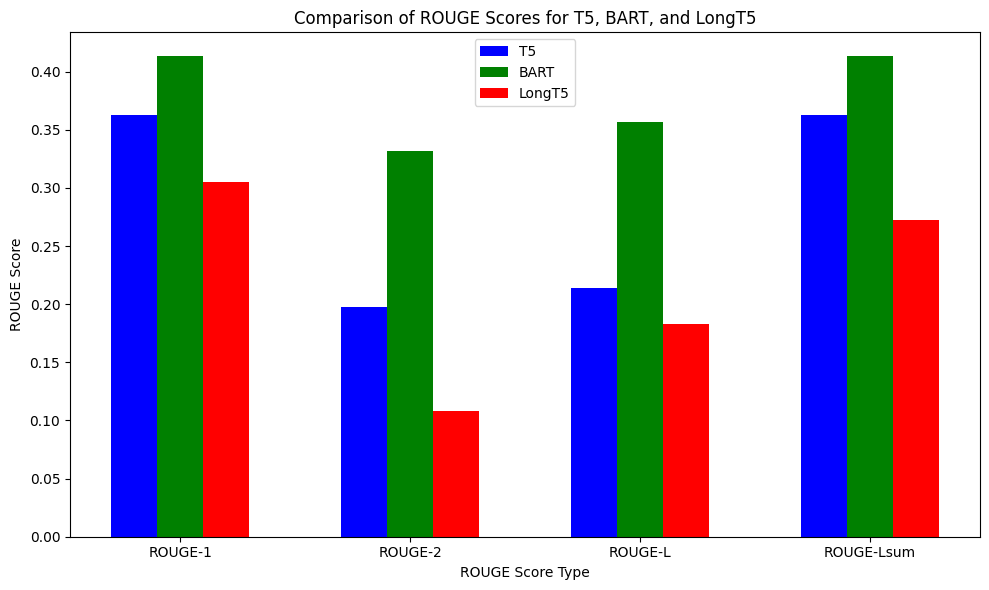

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE scores for each model
scores_t5 = [0.3627906976744186, 0.1971830985915493, 0.21395348837209308, 0.3627906976744186]
scores_bart = [0.41314553990610325, 0.33175355450236965, 0.35680751173708924, 0.41314553990610325]
scores_longT5 = [0.30516431924882625, 0.10849056603773585, 0.18309859154929578, 0.2723004694835681]

score_types = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum']

x = np.arange(len(score_types))

width = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - width, scores_t5, width, label='T5', color='b')
ax.bar(x, scores_bart, width, label='BART', color='g')
ax.bar(x + width, scores_longT5, width, label='LongT5', color='r')

ax.set_xlabel('ROUGE Score Type')
ax.set_ylabel('ROUGE Score')
ax.set_title('Comparison of ROUGE Scores for T5, BART, and LongT5')
ax.set_xticks(x)
ax.set_xticklabels(score_types)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


From the above Bar graph it clearly shows that Bart LLM as outperformed other 2 LLMs

# Fine Tuning T5-small model

In [ ]:
from transformers import T5Tokenizer

tokenizer = T5Tokenizer.from_pretrained("t5-small")


def tokenize(example):
    inputs = tokenizer(
        example["input_text"],
        padding="max_length",
        truncation=True,
        max_length=384
    )
    targets = tokenizer(
        example["target_text"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

    # Proper way to add labels for batched input
    inputs["labels"] = targets["input_ids"]
    return inputs


tokenized_dataset = dataset.map(tokenize, batched=True)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
import numpy as np
import evaluate
rouge = evaluate.load("rouge")

import numpy as np
from transformers import EvalPrediction

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    if isinstance(predictions, tuple):
        predictions = predictions[0]
    if predictions.ndim == 3:
        predictions = np.argmax(predictions, axis=-1)

    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value * 100 for key, value in result.items()}


    return result


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

from transformers import T5ForConditionalGeneration, TrainingArguments, Trainer

model = T5ForConditionalGeneration.from_pretrained("t5-small")
model.gradient_checkpointing_enable()

training_args = TrainingArguments(
    output_dir="./t5-summarizer",
    per_device_train_batch_size=1,
    per_device_eval_batch_size=1,
    eval_strategy="epoch",
    logging_dir="./logs",
    # logging_steps=10,
    save_total_limit=2,
    num_train_epochs=3,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
<ipython-input-12-0e6a51a66378>:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`...


Epoch,Training Loss,Validation Loss,Rouge1,Rouge2,Rougel,Rougelsum
1,0.916200,0.463798,93.185351,88.413111,92.911248,92.949128
2,0.498800,0.415378,94.081543,89.760538,93.755274,93.824107
3,0.468800,0.406630,94.221716,89.997072,93.849396,93.927438


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


TrainOutput(global_step=2700, training_loss=0.5827742230450665, metrics={'train_runtime': 403.2967, 'train_samples_per_second': 6.695, 'train_steps_per_second': 6.695, 'total_flos': 274067147980800.0, 'train_loss': 0.5827742230450665, 'epoch': 3.0})

### saving the model


In [ ]:
import shutil
trainer.save_model("my-t5-summary-model")
tokenizer.save_pretrained("my-t5-summary-model")

shutil.make_archive('my-t5-summary-model', 'zip', 'my-t5-summary-model')


'/content/my-t5-summary-model.zip'

### Testing on a sample

In [ ]:
rouge = load("rouge")
model = T5ForConditionalGeneration.from_pretrained("my-t5-summary-model")
tokenizer = T5Tokenizer.from_pretrained("my-t5-summary-model")
text = dataset['test'][0]['input_text']
refer = dataset['test'][0]['target_text']


inputs = tokenizer(text, max_length=512, truncation=True, return_tensors="pt")
decoded_input_text = tokenizer.decode(inputs['input_ids'][0], skip_special_tokens=True)

# Summarize the input text using the model and tokenizer
summarizer = pipeline('summarization', model=model, tokenizer=tokenizer)
summary = summarizer(decoded_input_text, max_length=1024, min_length=50, do_sample=False)

generated_summary = summary[0]['summary_text']

rouge_scores = rouge.compute(predictions=[generated_summary], references=[refer])

# Print ROUGE scores
print("ROUGE Scores:", rouge_scores)


Device set to use cuda:0
Token indices sequence length is longer than the specified maximum sequence length for this model (514 > 512). Running this sequence through the model will result in indexing errors
Your max_length is set to 1024, but your input_length is only 514. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=257)


ROUGE Scores: {'rouge1': np.float64(0.7385892116182573), 'rouge2': np.float64(0.6861924686192469), 'rougeL': np.float64(0.7385892116182573), 'rougeLsum': np.float64(0.7385892116182573)}


In [ ]:
summary

[{'summary_text': 'The Nystrom method is an efficient technique to speed up large-scale learning applications by generating low-rank approximations. Cru- cial to the performance of this technique is the assumption that a matrix can be well approximated by working exclusively with a subset of its columns. In this work we re- late this assumption to the concept of ma- trix coherence and connect matrix cohérence to the performances of the Nystrom Method. Making use of related work in the compressed sensing and the matrix completion literature, we then present empirical results that corroborate these theoretical bounds. We'}]

In [ ]:
!pip install -q faiss-cpu  sentence-transformers spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.7 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm pypdf

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.3/302.3 kB 7.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# RAG Implementation for user query model

In [ ]:
import os
import faiss
import torch
import spacy
from pypdf import PdfReader
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

### uploading the paper

In [ ]:
nlp = spacy.load("en_core_web_sm")

# ✅ Upload your research paper (PDF)
from google.colab import files
uploaded = files.upload()
pdf_path = list(uploaded.keys())[0]

Saving An_Ocular_Feature-Based_Novel_Biomarker_Determination_for_Glaucoma_Diagnosis_Using_Supervised_Machine_Learning_and_Fundus_Imaging.pdf to An_Ocular_Feature-Based_Novel_Biomarker_Determination_for_Glaucoma_Diagnosis_Using_Supervised_Machine_Learning_and_Fundus_Imaging.pdf


### Generating summary using the fine tuned model


In [ ]:
import re
reader = PdfReader(pdf_path)
raw_text = ""
for page in reader.pages:
    raw_text += page.extract_text() + "\n"


def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.encode('ascii', 'ignore').decode()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'(References|Bibliography|Appendix).*$', '', text, flags=re.IGNORECASE)

    return text.strip()
text = preprocess_text(raw_text)

summarizer = pipeline('summarization', model = 'my-t5-summary-model')
summary = summarizer(text, max_length=1024, min_length=50,do_sample=False)
generated_summary = summary[0]['summary_text']


Device set to use cuda:0
Token indices sequence length is longer than the specified maximum sequence length for this model (4293 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
generated_summary

'The proposed feature set is investigated by combining both structural and nonstructural features, which act as a novel glaucoma biomarker for diagnosis and improving automated systems for ophthalmologists. In this work, a reduced, powerful 60 feature set was found to outperform all SOTA approaches with an accuracy of 85.42% and low computational time of 32s, respectively. However, relying on CDR alone may be considered as the best option for the binary classification of retinal images as healthy or healthy eyes.'

DIVIDING LONG TEXT INTO CHUNKS OF 512 TOKENS


In [ ]:
from transformers import AutoTokenizer

# Function to chunk the text into smaller chunks, considering token limits
def chunk_text(text, max_tokens=512):
    sentences = text.split('. ')  # Split based on sentence end (you can adjust the logic here)
    chunks = []
    current_chunk = ""

    for sentence in sentences:
        # Check if adding the sentence exceeds the max tokens
        new_chunk = current_chunk + sentence + ". "
        if len(tokenizer.encode(new_chunk)) <= max_tokens:
            current_chunk = new_chunk
        else:
            # If chunk exceeds max tokens, save the current chunk and start a new one
            chunks.append(current_chunk.strip())
            current_chunk = sentence + ". "

    if current_chunk.strip():
        chunks.append(current_chunk.strip())

    return chunks
chunks = chunk_text(raw_text, max_tokens=512)



### USING SENTENCE TRANSFORMER MODEL TO CREATE EMBEDDINGS AND INDEX ASSIGNED IN  FAISS



In [ ]:
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(chunks)


index = faiss.IndexFlatL2(embeddings.shape[1])
index.add(embeddings)

###USER-QUERY MODEL


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import faiss
import numpy as np


qa_pipeline = pipeline("text2text-generation", model=model, tokenizer=tokenizer)
def retrieve_relevant_chunk(question, index, chunks, embedder):

    question_embedding = embedder.encode([question])

    D, I = index.search(np.array(question_embedding).astype(np.float32), k=1)  # Get the top 1 chunk


    relevant_chunk = chunks[I[0][0]]
    return relevant_chunk

def get_answer_from_question(question, index, chunks, embedder, qa_pipeline):
    relevant_chunk = retrieve_relevant_chunk(question, index, chunks, embedder)

    input_text = f"question: {question} context: {relevant_chunk}"

    answer = qa_pipeline(input_text, max_length=1024, min_length=50, num_return_sequences=1, do_sample=True, top_p=0.95, top_k=60)
    return answer[0]['generated_text']

question = input("Ask a question about the document: ")
answer = get_answer_from_question(question, index, chunks, embedder, qa_pipeline)
print("Answer:", answer)


Device set to use cuda:0


Ask a question about the document: How is the weather today?
Answer: Currently, the proposed feature set, using the Extra Tree classifier, achieves the highest accuracy of 85.42% compared to related Authorized licensed use limited to: PES University Bengaluru. Downloaded on February 04,2025 at 08:58:06 UTC from IEEE Xplore
